- <a href='#1'>1. Data</a>
    - <a href='#1.1'>1.1. Data overview</a>
- <a href='#2'>2. Data Cleansing</a>
- <a href='#3'>3. Exploratory Analysis</a>
    - <a href='#3.1'>3.1.Churn Ratio Comparison</a>
    - <a href='#3.2'>3.2. Frequency Distribution of Tenure</a>
    - <a href='#3.3'>3.3. Frequency Distribution of Targets</a>
    - <a href='#3.4'>3.4. Distribution Plot of Monthly and Total Charges </a>
- <a href='#4'>4. Data Preprocessing</a>
    - <a href='#4.1'>4.1. Deal with Categorical Variables</a>
    - <a href='#4.2'>4.2. Scaling and Splitting</a>
- <a href='#5'>5. Logistic Regression Model</a>
- <a href='#6'>6. Random Forest Classifier</a>
    - <a id='6.1'>6.1. Number of Leaf Nodes- Grid Search</a>
    - <a id='6.2'>6.2. Predictions</a>
- <a href='#7'>7. Decision Tree Regression</a>
- <a href='#8'>8. Decision Tree Regression</a>
    - <a href='#8.1'>8.1. Decision Tree</a>
- <a href='#9'>9. Random Forest Regression</a> 

# <a id='1'>1.Data</a>

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
raw_data = pd.read_csv("../input/WA_Fn-UseC_-Telco-Customer-Churn.csv")
raw_data.head()

/kaggle/input/WA_Fn-UseC_-Telco-Customer-Churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## <a id='1.1'>1.1. Data overview</a>

In [2]:
raw_data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,9540-JYROE,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


 # <a id='2'>2. Data Cleansing</a>

In [3]:
#mapping senior citizen 1 to yes and 0 to no for visulization purposes and check info to identify data types
raw_data['SeniorCitizen']=raw_data['SeniorCitizen'].map({1:'Yes', 0:'No'})
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(1), ob

In [4]:
#Seems No null values but some elements in TotalCharges columns are spaces (''), those do not not showup as nulls 
raw_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# change '' to NaN
raw_data_with_nan  = raw_data.replace(' ', np.nan)
# now we have 11 null elements
raw_data_with_nan.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
#mising values (null) percentage is small(0.15%). We can drop all those rows
print ("Missing Values Percentage: {}%".format(11/raw_data_with_nan.shape[0]*100))
data_no_mv = raw_data_with_nan.dropna(axis=0)
#change data type of TotalCharges, object to float for further analysis 
data_no_mv['TotalCharges'] = data_no_mv['TotalCharges'].astype(float)

#customer id does not effect on analysis. It will drop from the dataset
data_no_mv_no_id = data_no_mv.drop(['customerID'],axis=1)

Missing Values Percentage: 0.1561834445548772%


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


 # <a id='3'>3. Exploratory Analysis</a>

## <a id='3.1'>3.1.Churn Ratio Comparison</a>

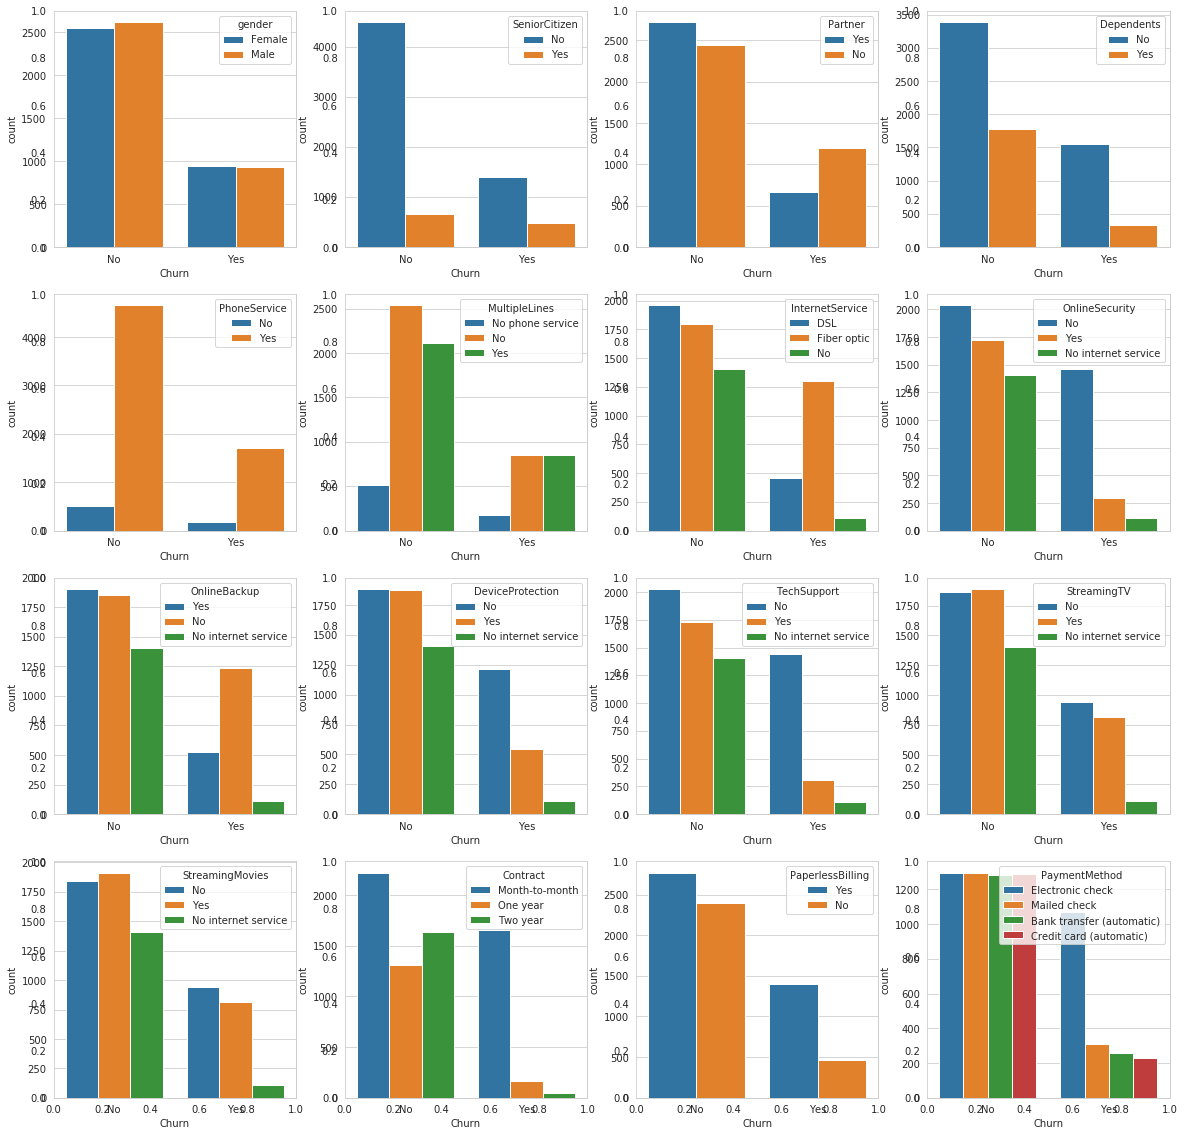

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
#collect all columns with datatype 'Object'
object_cols = list(data_no_mv_no_id.select_dtypes(include=['object']).columns)
#remove "Churn" column
object_cols.remove('Churn')
fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharex=True)
i=0
for colname in object_cols:
  i=i+1
  ax1 = fig.add_subplot(4,4,i)
  sns.countplot(x='Churn', hue=colname, data=data_no_mv_no_id)
plt.show()

## <a id='3.2'>3.2. Frequency Distribution of Tenure</a>

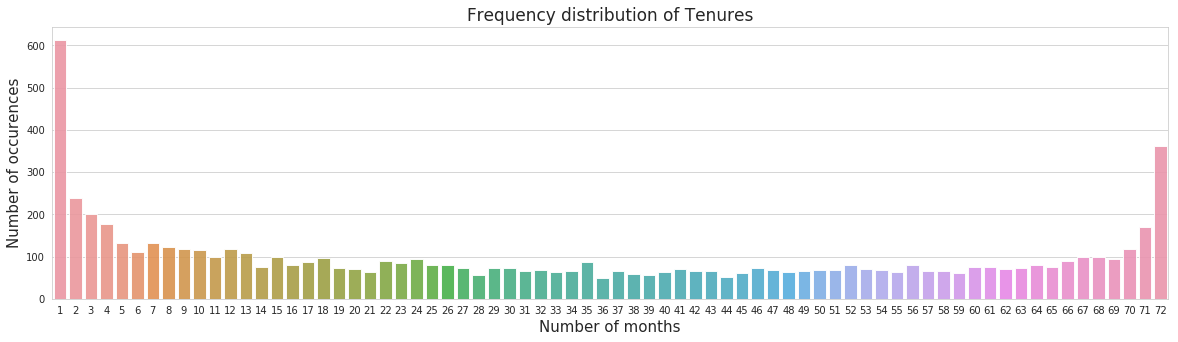

In [8]:
plt.figure(figsize=(20,5))
tenure_count = data_no_mv_no_id['tenure'].value_counts()
sns.barplot(tenure_count.index, tenure_count.values, alpha=0.9)
plt.title('Frequency distribution of Tenures', fontsize='17')
plt.xlabel('Number of months', fontsize='15')
plt.ylabel('Number of occurences',fontsize='15')
plt.show()

## <a id='3.3'>3.3. Frequency Distribution of Targets</a>

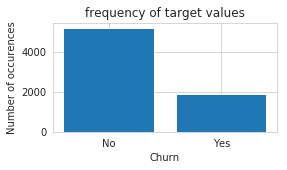

In [9]:
churn_count = data_no_mv_no_id['Churn'].value_counts()
plt.figure(figsize=(4,2))
plt.bar(churn_count.index,churn_count.values)
plt.xlabel('Churn')
plt.ylabel('Number of occurences')
plt.title('frequency of target values')
plt.show()

## <a id='3.4'>3.4. Distribution Plot of Monthly Charges</a>

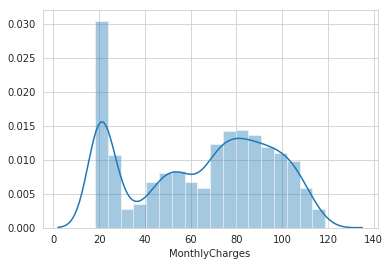

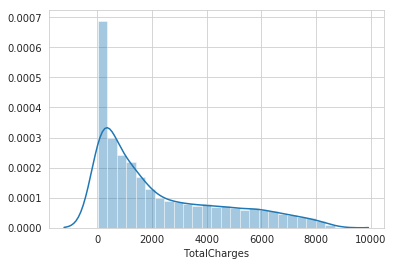

In [10]:
sns.distplot(data_no_mv_no_id['MonthlyCharges'])
plt.show()
sns.distplot(data_no_mv_no_id['TotalCharges'])
plt.show()

# <a id='4'>4. Data Preprocessing</a>

## <a id='4.1'>4.1. Deal with Categorical Variables</a>

In [11]:
# change categorical variables to numerical variables (one-hot). Drop first column for each 
# category to avoid extra correlinearity.
data_pre_processed = pd.get_dummies(data_no_mv_no_id,drop_first=True)
#separate input and targets
inputs = data_pre_processed.drop('Churn_Yes', axis=1)
targets = data_pre_processed['Churn_Yes']

## <a id='4.2'>4.2. Scaling and Splitting</a>

In [12]:
# Import the scaling module to scale data
from sklearn.preprocessing import StandardScaler
# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)
# scale input data
inputs_scaled = scaler.transform(inputs)
# Import the module for the split
from sklearn.model_selection import train_test_split
# Split the variables with an 80-20 split and some random state 
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=1)

# <a id='5'>5. Logistic Regression Model</a>

In [13]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
#fit data to logistic model
log_model.fit(x_train,y_train)
# get prediction on train data itself to measure the performance of the model 
y_hat = log_model.predict(x_train)
#import confusion matrix
from sklearn.metrics import confusion_matrix
#create confusion matrix on train data
print('confusion matrix for training data = ', confusion_matrix(y_hat,y_train))
#import accurracy score 
from sklearn.metrics import accuracy_score
#compute accuray score of model on training data
print('acuracy score for training data = ', accuracy_score(y_hat,y_train))

confusion matrix for training data =  [[3697  662]
 [ 425  841]]
acuracy score for training data =  0.8067555555555556


In [14]:
#prediction on test data 
predictions = log_model.predict(x_test)
print('confusion matrix for test data = ', confusion_matrix(predictions,y_test))
logistic_acc = accuracy_score(predictions,y_test)
print('acuracy score for training data = ',logistic_acc)

confusion matrix for test data =  [[926 171]
 [115 195]]
acuracy score for training data =  0.7967306325515281


 # <a id='6'>6. Random Forest Classifier</a>

 ## <a id='6.1'>6.1. Number of Leaf Nodes- Grid Search</a>

minimum validation error =  0.19610524158221526
minimum error reaches for the number of leaf_nodes =  117


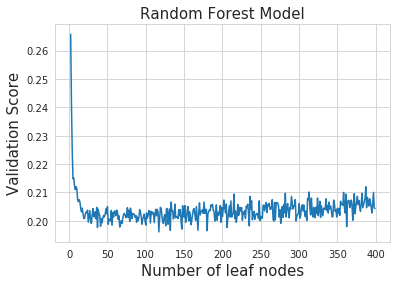

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
leaf_nodes_list = range(2,400)
score_list = []
for n_nodes in leaf_nodes_list:
  rf_clf = RandomForestClassifier( max_leaf_nodes=n_nodes)
  scores = cross_val_score(rf_clf, inputs, targets, scoring = "neg_mean_squared_error", cv=10)
  score_list.append(-scores.mean())
print('minimum validation error = ',min(score_list))
rfc_leaf_node = leaf_nodes_list[score_list.index(min(score_list))]
print('minimum error reaches for the number of leaf_nodes = ', rfc_leaf_node)
plt.plot(leaf_nodes_list,score_list)
plt.xlabel('Number of leaf nodes',fontsize=15)
plt.ylabel('Validation Score',fontsize=15)
plt.title('Random Forest Model',fontsize=15)
plt.show()

minimum validation error =  0.19695690641414326
minimum error reaches for the number of leaf_nodes =  188
minimum validation std =  0.009318890842619993
minimum std reaches for the number of leaf_nodes =  121


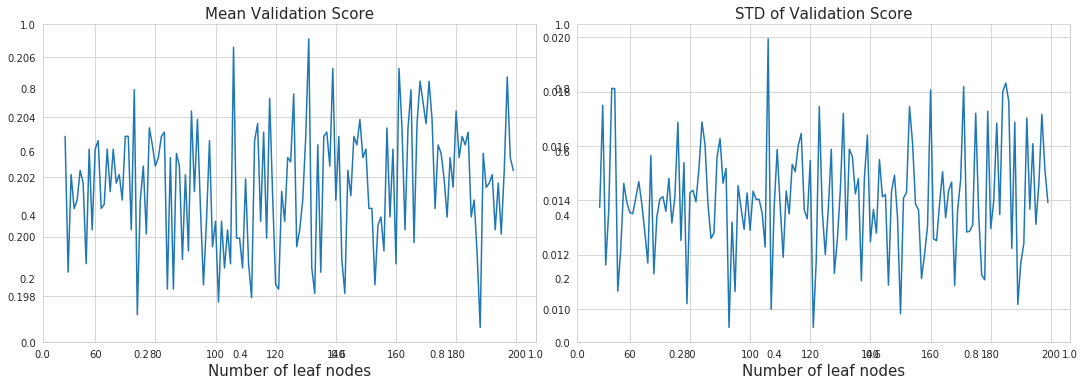

In [16]:
from sklearn.ensemble import RandomForestClassifier
#pre-test shows minmum between 50 and 200
leaf_nodes_list = range(50,200)
score_list = []
std_list=[]
for n_nodes in leaf_nodes_list:
    rf_clf = RandomForestClassifier( max_leaf_nodes=n_nodes)
    scores = cross_val_score(rf_clf, inputs, targets, scoring = "neg_mean_squared_error", cv=10)
    score_list.append(-scores.mean())
    std_list.append(scores.std())
print('minimum validation error = ',min(score_list))
rfc_min_score_leaf_node = leaf_nodes_list[score_list.index(min(score_list))]
print('minimum error reaches for the number of leaf_nodes = ', rfc_min_score_leaf_node )
print('minimum validation std = ',min(std_list))
rfc_min_std_leaf_node=leaf_nodes_list[std_list.index(min(std_list))]
print('minimum std reaches for the number of leaf_nodes = ', rfc_min_std_leaf_node)
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=False)
fig.tight_layout()
ax1 = fig.add_subplot(1,2,1)
plt.plot(leaf_nodes_list,score_list)
plt.xlabel('Number of leaf nodes',fontsize=15)
plt.title('Mean Validation Score',fontsize=15)
ax1 = fig.add_subplot(1,2,2)
plt.plot(leaf_nodes_list,std_list)
plt.xlabel('Number of leaf nodes',fontsize=15)
plt.title('STD of Validation Score',fontsize=15)
plt.show()

 ## <a id='6.2'>6.2. Predictions</a>

In [17]:
Tree_x_train, Tree_x_test, Tree_y_train, Tree_y_test = train_test_split(inputs, targets, test_size=0.3, random_state=15)
rf_clf = RandomForestClassifier(random_state=30,max_leaf_nodes=rfc_min_score_leaf_node)
#fit data to random forest model
rf_clf.fit(Tree_x_train,Tree_y_train)
#make predictions of train data itself
rf_clf_hat = rf_clf.predict(Tree_x_test)
print('Prediction with the leaf node corresponding to the minimum validation score')
#accuracy score
display(accuracy_score(rf_clf_hat,Tree_y_test))
#confusion matrix
print(confusion_matrix(rf_clf_hat,Tree_y_test))

Prediction with the leaf node corresponding to the minimum validation score


0.8004739336492891

[[1411  283]
 [ 138  278]]


In [18]:
Tree_x_train, Tree_x_test, Tree_y_train, Tree_y_test = train_test_split(inputs, targets, test_size=0.3, random_state=15)
rf_clf = RandomForestClassifier(random_state=30,max_leaf_nodes=rfc_min_std_leaf_node)
#fit data to random forest model
rf_clf.fit(Tree_x_train,Tree_y_train)
#make predictions of train data itself
rf_clf_hat = rf_clf.predict(Tree_x_test)
print('Prediction with the leaf node corresponding to the minimum standard diviation of validation score')
#accuracy score
display(accuracy_score(rf_clf_hat,Tree_y_test))
#confusion matrix
print(confusion_matrix(rf_clf_hat,Tree_y_test))

Prediction with the leaf node corresponding to the minimum standard diviation of validation score


0.8075829383886256

[[1424  281]
 [ 125  280]]


# <a id='7'>7. Decision Tree Classifier</a>

minimum validation error =  0.20605731847508163
minimum error reaches for the number of leaf_nodes =  48


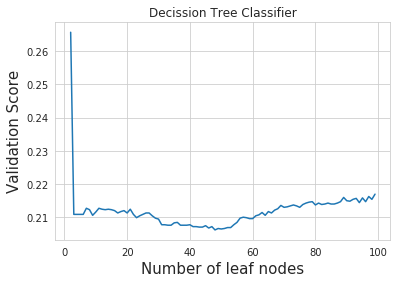

In [19]:
from sklearn.tree import DecisionTreeClassifier
leaf_nodes_list = range(2,100)
score_list = []
for n_nodes in leaf_nodes_list:
  dt_clf = DecisionTreeClassifier( max_leaf_nodes=n_nodes)
  scores = cross_val_score(dt_clf, inputs, targets, scoring = "neg_mean_squared_error", cv=10)
  score_list.append(-scores.mean())
print('minimum validation error = ',min(score_list))
dtc_leaf_node = leaf_nodes_list[score_list.index(min(score_list))]
print('minimum error reaches for the number of leaf_nodes = ', dtc_leaf_node)
plt.plot(leaf_nodes_list,score_list)
plt.xlabel('Number of leaf nodes',fontsize=15)
plt.ylabel('Validation Score',fontsize=15)
plt.title('Decission Tree Classifier')
plt.show()

In [20]:
dt_clf = DecisionTreeClassifier(random_state = 1, max_leaf_nodes=dtc_leaf_node)
#fit data to the decision tree model
dt_clf.fit(Tree_x_train,Tree_y_train)
#make a prediction
dt_clf_hat= dt_clf.predict(Tree_x_test)
print('predictions using the number of leaf nodes corresponding to the minimum validation score ')
#accuray score
print('accuary score = ' ,accuracy_score(Tree_y_test,dt_clf_hat))
#confusion matrix
print('confusion matrix = ',confusion_matrix(dt_clf_hat,Tree_y_test))

predictions using the number of leaf nodes corresponding to the minimum validation score 
accuary score =  0.7867298578199052
confusion matrix =  [[1376  277]
 [ 173  284]]


 # <a id='8'>8. Decision Tree Regression</a>

minimum validation error =  0.14239692993285222
minimum error reaches for the number of leaf_nodes =  19


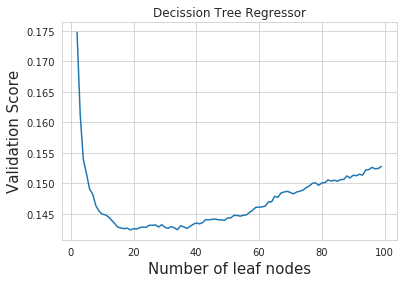

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
leaf_nodes_list = range(2,100)
score_list = []
for n_nodes in leaf_nodes_list:
  dec_tree_model = DecisionTreeRegressor( max_leaf_nodes=n_nodes)
  scores = cross_val_score(dec_tree_model, inputs, targets, scoring = "neg_mean_squared_error", cv=10)
  score_list.append(-scores.mean())
print('minimum validation error = ',min(score_list))
dtr_leaf_node = leaf_nodes_list[score_list.index(min(score_list))]
print('minimum error reaches for the number of leaf_nodes = ', dtr_leaf_node)
plt.plot(leaf_nodes_list,score_list)
plt.xlabel('Number of leaf nodes',fontsize=15)
plt.ylabel('Validation Score',fontsize=15)
plt.title('Decission Tree Regressor')
plt.show()

In [22]:
dt_reg = DecisionTreeRegressor(random_state = 1, max_leaf_nodes=dtr_leaf_node)
#fit data to the decision tree model
dt_reg.fit(Tree_x_train,Tree_y_train)
#make a prediction
dt_reg_hat= dt_reg.predict(Tree_x_test).round()
print('predictions using the number of leaf nodes corresponding to the minimum validation score ')
#accuray score
print('accuracy score = ', accuracy_score(Tree_y_test,dt_reg_hat.round()))
#confusion matrix
print('confusion matrix = ' ,confusion_matrix(dt_reg_hat.round(),Tree_y_test))

predictions using the number of leaf nodes corresponding to the minimum validation score 
accuracy score =  0.7862559241706161
confusion matrix =  [[1322  224]
 [ 227  337]]


 ## <a id='8.1'>8.1. Decision Tree</a>

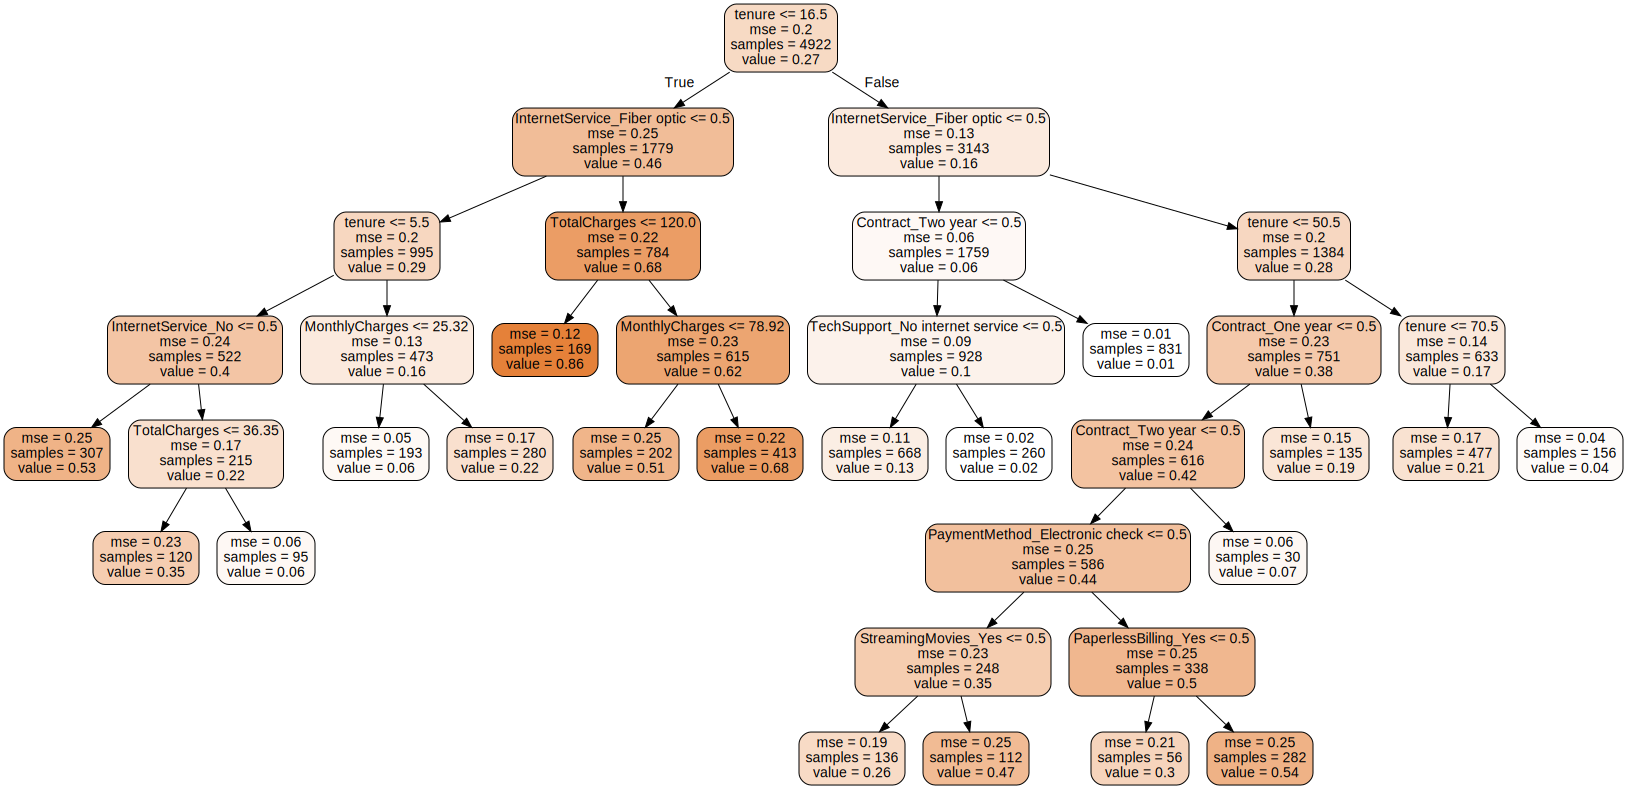

In [23]:
feature_cols = list(inputs.columns)
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display

graph = Source(tree.export_graphviz(dt_reg,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = feature_cols, 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True                         
                                       )
                  )

display(graph)

 # <a id='9'>9. Random Forest Regression</a> 

minimum validation error =  0.13648911563232902
minimum error reaches for the number of leaf_nodes =  33


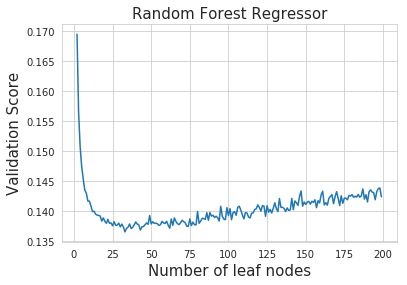

In [24]:
from sklearn.ensemble import RandomForestRegressor
leaf_nodes_list = range(2,200)
score_list = []
for n_nodes in leaf_nodes_list:
  rf_reg = RandomForestRegressor( max_leaf_nodes=n_nodes)
  scores = cross_val_score(rf_reg, inputs, targets, scoring = "neg_mean_squared_error", cv=10)
  score_list.append(-scores.mean())
print('minimum validation error = ',min(score_list))
rfr_leaf_node = leaf_nodes_list[score_list.index(min(score_list))]
print('minimum error reaches for the number of leaf_nodes = ', rfr_leaf_node)
plt.plot(leaf_nodes_list,score_list)
plt.xlabel('Number of leaf nodes',fontsize=15)
plt.ylabel('Validation Score',fontsize=15)
plt.title('Random Forest Regressor',fontsize=15)
plt.show()

In [25]:
rf_reg = RandomForestRegressor(random_state=1,max_leaf_nodes=rfr_leaf_node)
#fit data to random forest model
rf_reg.fit(Tree_x_train,Tree_y_train)
#make predictions 
rf_reg_hat = rf_reg.predict(Tree_x_test)
print('predictions using the number of leaf nodes corresponding to the minimum validation score ')
#accuracy score
print('accuracy socre = ',accuracy_score(rf_reg_hat.round(),Tree_y_test))
#confusion matrix
print('confusion matrix = ',confusion_matrix(rf_reg_hat.round(),Tree_y_test))

predictions using the number of leaf nodes corresponding to the minimum validation score 
accuracy socre =  0.7976303317535545
confusion matrix =  [[1418  296]
 [ 131  265]]
